# Lead Scoring Case Study

The study is conducted for X Education in an effort to increase the number of customers visiting their site enrolled in their courses. It aims to build an analytical model that can estimate the lead score for the new customer based on learning from past data.

## Data

For the construction of the analytical model, a dataset of historical leads including around 9000 data points is supplied. In this instance, the target variable is the column 'Converted,' which indicates whether a previous lead was converted or not.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<AxesSubplot:title={'center':'Distribution of data between target classes'}>

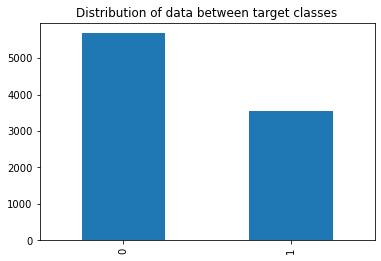

In [5]:
plt.title("Distribution of data between target classes")
leads.Converted.value_counts().plot.bar()

In [6]:
leads.describe(include="all")

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7e2819e8-97f0-416b-bcb6-45ef14f0e11a,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


## Data Cleaning

### Check constants and uniques

In [7]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

__Remove columns with unique values__

In [8]:
leads = leads.drop(columns = ["Prospect ID", "Lead Number"])

__Remove columns with constant values__

In [9]:
constants = leads.nunique()[leads.nunique() == 1]
print(constants)
leads = leads.drop(columns = constants.index)

Magazine                                    1
Receive More Updates About Our Courses      1
Update me on Supply Chain Content           1
Get updates on DM Content                   1
I agree to pay the amount through cheque    1
dtype: int64


### Check the number of unique categories in each categorical column

__Check columns with more number of constant values and highly imbalanced categorical group__ 

In [10]:
leads["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [11]:
leads["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [12]:
leads["Newspaper Article"].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [13]:
leads["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [14]:
leads["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [15]:
leads["A free copy of Mastering The Interview"].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [16]:
leads["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [17]:
leads["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [18]:
leads["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

The value counts of most the above columns ('Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'), there were a few columns in which only one value was significantly present for all of the data points, making them useless to the analysis, therefore we should eliminate them.

In [19]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
leads = leads.drop(columns=['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'What matters most to you in choosing a course'])

In [21]:
leads["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

The column has a greater number of categories, making it harder to utilise in the study; also, the column does not seem to have much relevance, so we may remove it.

In [22]:
leads = leads.drop(columns="Tags")

### Identify missing values

In [23]:
null_counts = (leads.isnull().sum() / len(leads)) * 100
null_counts

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            15.562771
How did you hear about X Education        23.885281
What is your current occupation           29.112554
Lead Quality                              51.590909
Lead Profile                              29.318182
City                                      15.367965
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique Profile Score                45.649351
A free copy 

__Check values that are potentially missing in categorical variable__

In [24]:
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [25]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [26]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Notably, the variables Lead Profile and How did you hear about X Education contain a large number of rows with the value Select, which is useless to the analysis, therefore we should remove them.

In [27]:
leads = leads.drop(columns = ['Lead Profile', 'How did you hear about X Education'])

### Drop columns having high percentage of missing values

In [28]:
high_missings = null_counts[null_counts>45]
high_missings

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [29]:
leads = leads.drop(columns = high_missings.index)

In [30]:
leads.shape

(9240, 14)

In [31]:
leads["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

As we can see, we don't have much information on the city, and the majority of the values are Other, thus we can remove the column.

In [32]:
leads = leads.drop(columns = "City")

In [33]:
leads["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Canada                     4
South Africa               4
Nigeria                    4
Kuwait                     4
Sweden                     3
Ghana                      2
Netherlands                2
Belgium                    2
Italy                      2
China                      2
Uganda                     2
Philippines                2
Bangladesh                 2
Asia/Pacific Region        2
Switzerland                1
Kenya                      1
Vietnam                    1
Tanzania                   1
Russia                     1
Indonesia                  1
Liberia       

Similarly, the country column has almost all of the values to India and very few distributed across several other countries. Also consideribng the high number of missing values it is good to drop the column.

In [34]:
leads = leads.drop(columns = "Country")

### Impute columns with less percentage of missing values

In [35]:
leads.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

We can simply remove the rows that have a small number of null values in the columns. And assuming that the inference inputs will have the values in real-time.

In [36]:
leads = leads[~leads["TotalVisits"].isnull()]

In [37]:
leads = leads[~leads["Lead Source"].isnull()]

In [38]:
leads.isnull().sum()[leads.isnull().sum()>0]

Specialization                     1431
What is your current occupation    2683
dtype: int64

In [39]:
leads["What is your current occupation"].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

Though the column What is your current occupation contains more number of missing values, it is more relevent to the business. So, it is better to drop the rows where the values are null for that column and keep the rest for analysis.

In [40]:
leads = leads[~leads["What is your current occupation"].isnull()]

In [41]:
leads.isnull().sum()[leads.isnull().sum()>0]

Specialization    18
dtype: int64

In [42]:
leads = leads[~leads["Specialization"].isnull()]

### Check the records retained in data cleaning process

In [43]:
leads.isnull().sum().sum()

0

In [44]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [45]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## Data Preparation

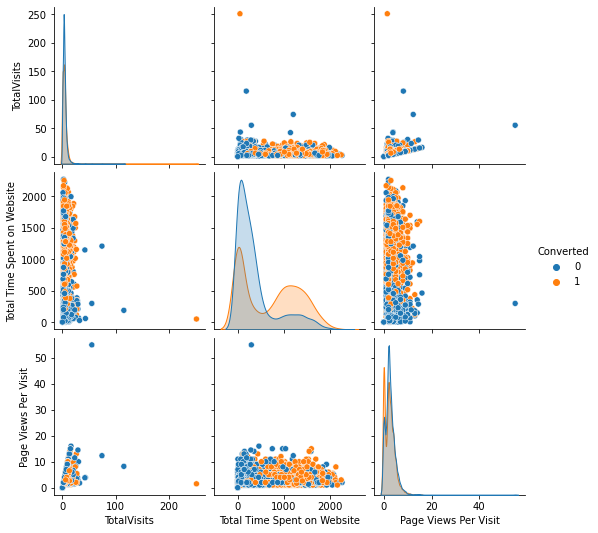

In [46]:
numeric_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']
sns.pairplot(leads[numeric_vars], diag_kind='kde', hue='Converted')
plt.show()

In [47]:
pt = PowerTransformer()
transformed_vals = pd.DataFrame(pt.fit_transform(leads[numeric_vars]))
transformed_vals.columns = numeric_vars
transformed_vals.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


The range of the numerical variables are wide which can make the vizualizationdifficult. Hence the power transformation is applied.

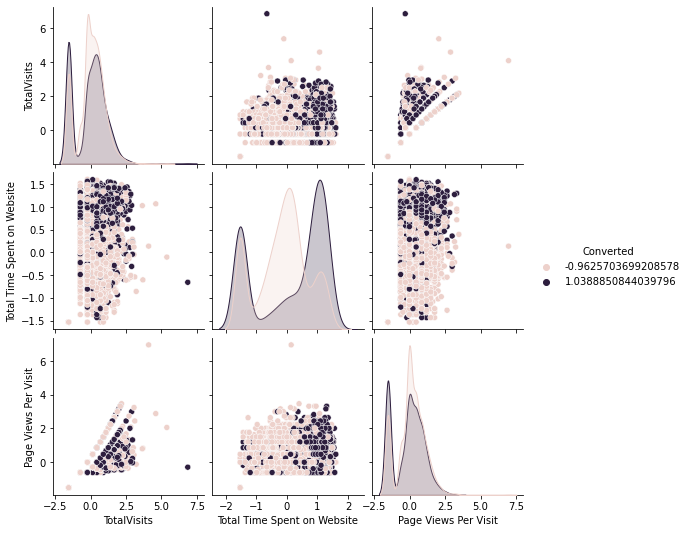

In [48]:
sns.pairplot(transformed_vals, diag_kind='kde', hue='Converted')
plt.show()

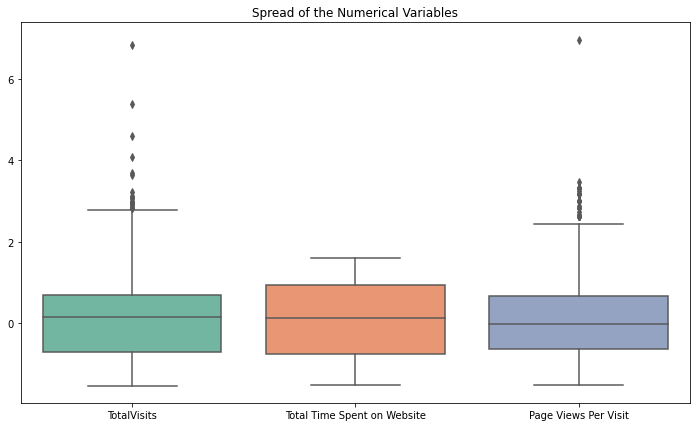

In [49]:

plt.figure(figsize=(12, 7))
plt.title("Spread of the Numerical Variables")
sns.boxplot(data=transformed_vals.drop(columns = "Converted"), palette="Set2")
plt.show()

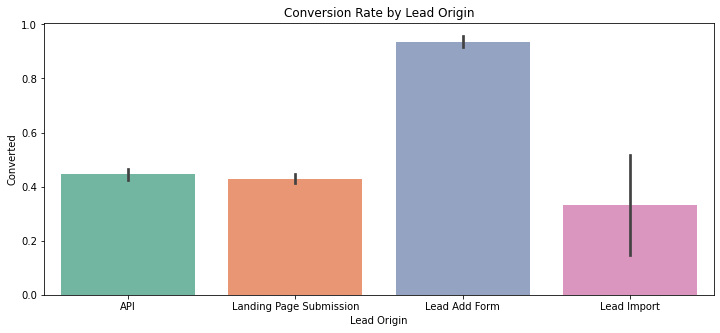

In [50]:
plt.figure(figsize=(12, 5))
plt.title("Conversion Rate by Lead Origin")
sns.barplot(data=leads, x="Lead Origin", y="Converted", palette="Set2")
plt.show()

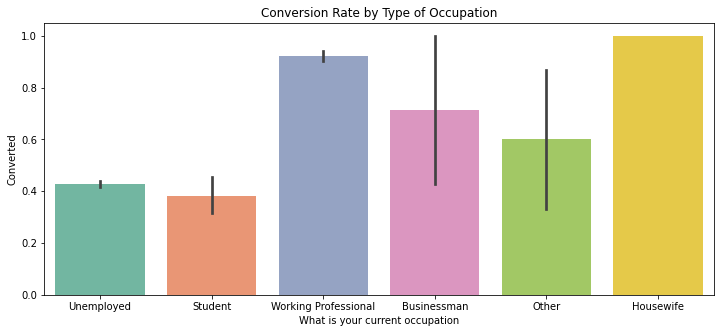

In [51]:
plt.figure(figsize=(12, 5))
plt.title("Conversion Rate by Type of Occupation")
sns.barplot(data=leads, x="What is your current occupation", y="Converted", palette="Set2")
plt.show()

### Group Categories having less number of values 

In [52]:
leads.nunique()

Lead Origin                                  4
Lead Source                                 16
Do Not Email                                 2
Converted                                    2
TotalVisits                                 38
Total Time Spent on Website               1613
Page Views Per Visit                       107
Last Activity                               16
Specialization                              19
What is your current occupation              6
A free copy of Mastering The Interview       2
Last Notable Activity                       14
dtype: int64

In [53]:
lead_source_val_counts = leads["Lead Source"].value_counts()
lead_source_val_counts

Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
testone                 1
Pay per Click Ads       1
Press_Release           1
WeLearn                 1
Name: Lead Source, dtype: int64

In [54]:
leads["Lead Source"] = leads["Lead Source"].apply(lambda x: "Other" if x in lead_source_val_counts[lead_source_val_counts < 75].index else x)

In [55]:
leads["Lead Source"].value_counts()

Google              2048
Direct Traffic      1873
Olark Chat           892
Organic Search       870
Reference            443
Welingak Website     129
Referral Sites        75
Other                 43
Name: Lead Source, dtype: int64

In [56]:
# Cannot be grouped since categories are too unique to group
leads["Last Activity"].value_counts()

Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visited on Website          427
Converted to Lead                292
Email Link Clicked               178
Email Bounced                    175
Form Submitted on Website         81
Unreachable                       71
Unsubscribed                      40
Had a Phone Conversation          23
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [57]:
# Cannot be grouped since categories are too unique to group
leads["Last Notable Activity"].value_counts()

Email Opened                    2038
Modified                        1947
SMS Sent                        1869
Page Visited on Website          213
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      31
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

### Encode categorical variables

In [58]:
leads["Specialization"].value_counts()

Select                               1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

In [59]:
# Creating a dummy variable for the variable 'Specialization' since it has the level 'Select' which is meaningless, 
# therefore we remove it directly.

dummy_specialization = pd.get_dummies(leads["Specialization"], prefix="Specialization")
dummy_specialization = dummy_specialization.drop(columns=["Specialization_Select"])

leads = pd.concat([leads, dummy_specialization], axis=1)

In [60]:
# Create dummy variables for rest of the categorical varaibles

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

leads = pd.concat([leads, dummy], axis=1)

In [61]:
# Remove the variables for which dummy variables were generated.

leads = leads.drop(columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'])

In [62]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
leads.shape

(6373, 67)

### Train Test Split

In [64]:
# Split the dataset into train and test sets in 7:3 ratio

X_train, X_test, y_train, y_test = train_test_split(leads.drop(columns="Converted"), 
                                                    leads["Converted"], 
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=100)

In [65]:
print("X Train:", X_train.shape)
print("y Train:", y_train.shape)
print("X Test:", X_test.shape)
print("y Test:", y_test.shape)

X Train: (4461, 66)
y Train: (4461,)
X Test: (1912, 66)
y Test: (1912,)


### Normalization

In [66]:
# Since the dummies are already in a 0 and 1 range, scale the other numeric variables

scaler = MinMaxScaler()

num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0.015936,0.029489,0.125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
218,0.015936,0.082306,0.250,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
X_train.isnull().sum().sum()

0

### Observe Corelation

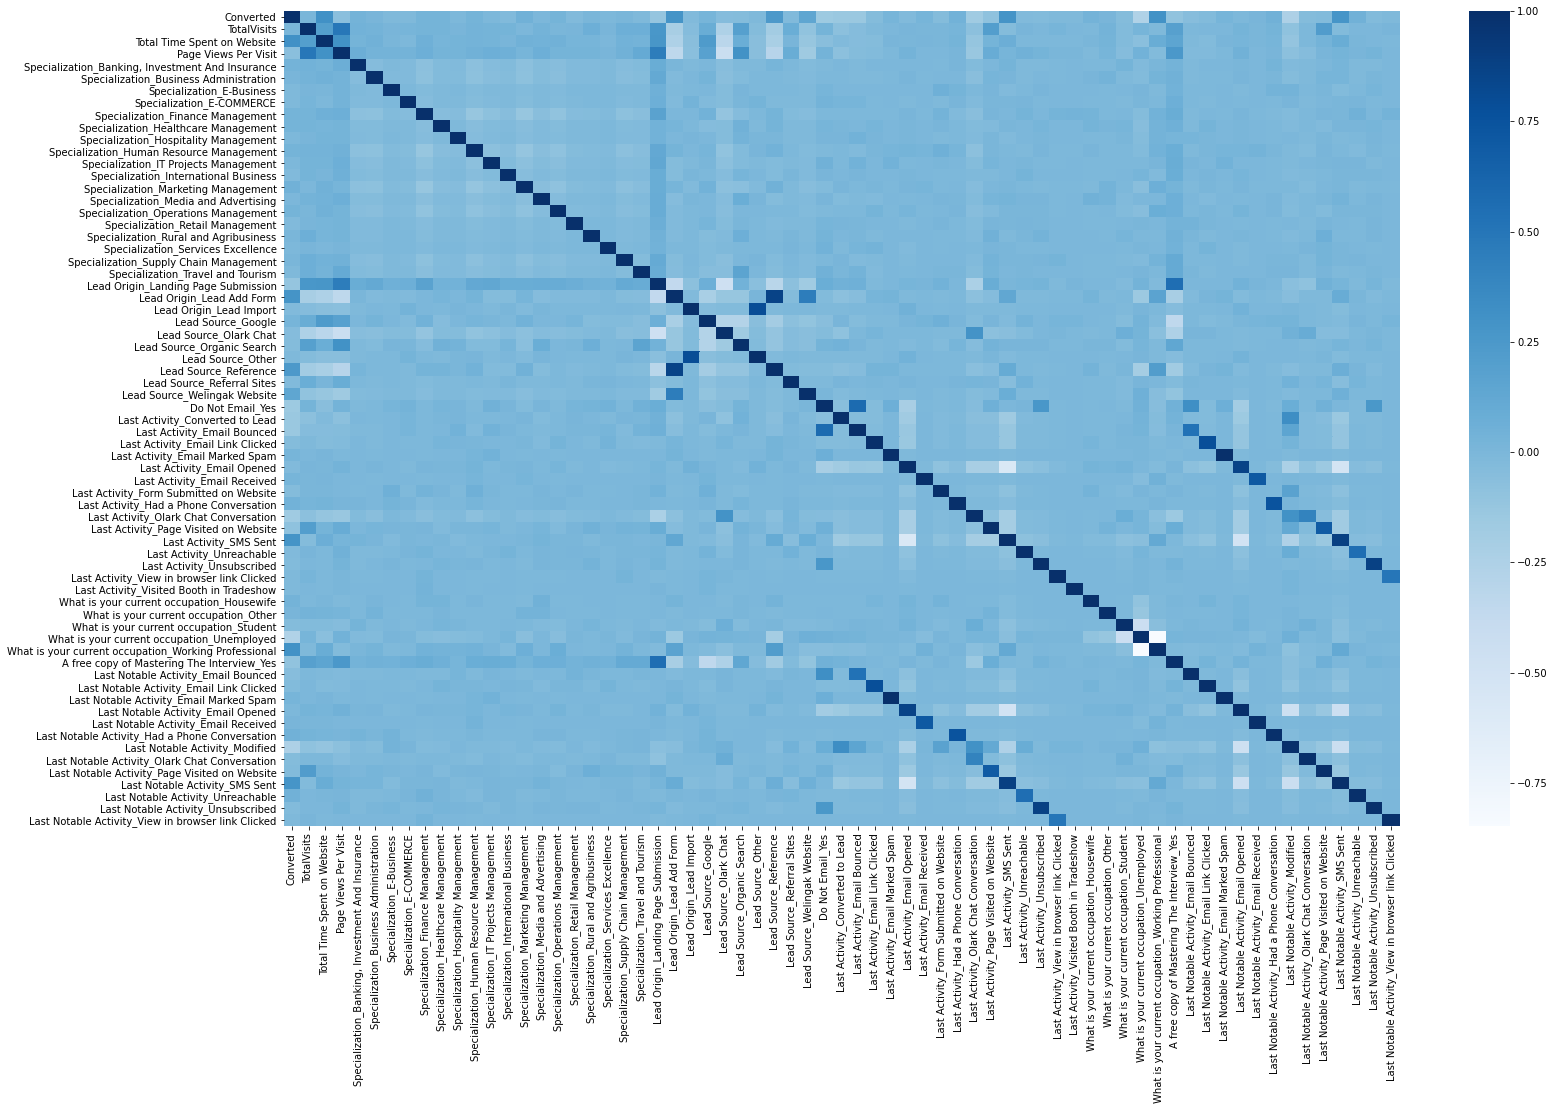

In [68]:
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr(), cmap="Blues")
plt.show()

We could see there is comparitively strong colurs on the top left corner of the heatmap, which indcates the numeric variables have better correlation with the target.

## Model Building

### Feature Selection

Since there are many features in the dataset it is not convenient to select them manually, hence in the first level the Recursive Feature Elimination technique is used. We will use the sklearn RFE class to automatically do the feature selection.

In [69]:
rfe = RFE(LogisticRegression(), n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [70]:
def rfe_result(X_train, y_train, n_features_to_select):
    lm = LogisticRegression()
    lm.fit(X_train, y_train)
    rfe = RFE(lm, n_features_to_select = n_features_to_select)
    rfe = rfe.fit(X_train, y_train)
    return pd.DataFrame({"Feature":X_train.columns, "Support":rfe.support_, "Rank":rfe.ranking_})

In [71]:
def rfe_rejects(X_train, y_train, n_features_to_select):
    rfe_df = rfe_result(X_train, y_train, n_features_to_select)
    return rfe_df[rfe_df.Support==False].sort_values(by="Rank", ascending=False)

In [72]:
# List of features rejected by RFE
rfe_rejs = rfe_rejects(X_train, y_train, n_features_to_select = 15)
rfe_rejs

,Feature,Support,Rank
35,Last Activity_Email Marked Spam,False,52
57,Last Notable Activity_Email Received,False,51
55,Last Notable Activity_Email Marked Spam,False,50
9,Specialization_Hospitality Management,False,49
18,Specialization_Services Excellence,False,48
37,Last Activity_Email Received,False,47
27,Lead Source_Other,False,46
34,Last Activity_Email Link Clicked,False,45
46,Last Activity_Visited Booth in Tradeshow,False,44
48,What is your current occupation_Other,False,43


In [73]:
# Choose only the columns selected by RFE

X_train = X_train[X_train.columns[rfe.support_]]

Now that we have all the RFE-selected variables, let's utilise them to develop a logistic regression model using statsmodels.

In [74]:
X_train_sm = sm.add_constant(X_train)
logmodel1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
logmodel1 = logmodel1.fit()
logmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 12 Jul 2022   Deviance:                       4145.5
Time:                        00:31:01   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

Many variables have p-values above.05. They'll represent a challenge. Let's look at VIFs then.

In [75]:
def vif_result(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [76]:
vif_result(X_train)

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


Clearly, three features have a high vif value.

Let's drop Lead Source Reference, which has a high p-value and VIF.

In [77]:
X_train = X_train.drop(columns = "Lead Source_Reference")

In [78]:
logmodel2 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logmodel2 = logmodel2.fit()
logmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 12 Jul 2022   Deviance:                       4146.5
Time:                        00:31:01   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [79]:
vif_result(X_train)

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


Droping the What is your current occupation_Housewife column based on p-value since vif is decent for all the features

In [80]:
X_train = X_train.drop(columns = "What is your current occupation_Housewife")

In [81]:
logmodel3 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logmodel3 = logmodel3.fit()
logmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.5
Date:                Tue, 12 Jul 2022   Deviance:                       4150.9
Time:                        00:31:01   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4519      0.554     -0.816      0.414      -1.537       0.633
TotalVisits                                             11.1469      2.667      4.179      0.000       5.919      16.375
Total Time Spent on Website                              4.4291      0.185     23.922      0.000       4.066       4.792
Lead Origin_Lead Add Form                                4.2058      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4532      0.122     11.932      0.000       1.215       1.692
Lead Source_Welingak Website                             2.1542      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5061      0.194     -7.783      0.000      -1.885      -1.127
Last Activity_Had a Phone Conversation                   1.0400      0.983      1.058      0.290      -0.886       2.966
Last Activity_SMS Sent                                   1.1824      0.082     14.360      0.000       1.021       1.344
What is your current occupation_Student                 -1.7030      0.588     -2.894      0.004      -2.856      -0.550
What is your current occupation_Unemployed              -1.8892      0.550     -3.437      0.001      -2.967      -0.812
What is your current occupation_Working Professional     0.7255      0.581      1.249      0.212      -0.413       1.864
Last Notable Activity_Had a Phone Conversation          22.1951   1.26e+04      0.002      0.999   -2.47e+04    2.48e+04
Last Notable Activity_Unreachable                        2.7844      0.807      3.449      0.001       1.202       4.367
========================================================================================================================
"""

In [82]:
vif_result(X_train)

,Features,VIF
9,What is your current occupation_Unemployed,3.64
6,Last Activity_Had a Phone Conversation,2.44
11,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


Drop the column Last Notable Activity_Had a Phone Conversation which has a high p-value

In [83]:
X_train = X_train.drop(columns = "Last Notable Activity_Had a Phone Conversation")

In [84]:
logmodel4 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logmodel4 = logmodel4.fit()
logmodel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 12 Jul 2022   Deviance:                       4156.7
Time:                        00:31:01   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [85]:
vif_result(X_train)

,Features,VIF
9,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.09


Drop the column What is your current occupation_Working Professional which has a high p-value

In [86]:
X_train = X_train.drop(columns = "What is your current occupation_Working Professional")

In [87]:
logmodel5 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
logmodel5 = logmodel5.fit()
logmodel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 12 Jul 2022   Deviance:                       4158.1
Time:                        00:31:02   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [88]:
vif_result(X_train)

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


Now, the p-values and VIFs seem to be acceptable for all variables.

## Model Evaluation 

__Predict y_train__

In [89]:
y_train_pred = logmodel5.predict(sm.add_constant(X_train))
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

__Bind actual output and the predicted probability__

In [90]:
# Establish a new dataframe with the conversion flag and estimated probabilities.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


__1 in 'Predicted' if Paid Prob > 0.5 otherwise 0__

In [91]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


__Confusion Matrix__

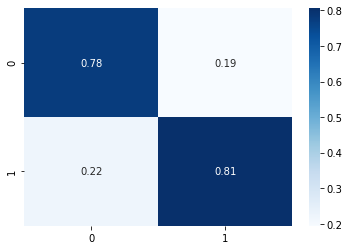

In [92]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
sns.heatmap(confusion / sum(confusion), annot=True, cmap="Blues")
plt.show()

In [93]:
TP, TN, FP, FN = confusion[1,1], confusion[0,0], confusion[0,1], confusion[1,0]

__Check the overall accuracy__

In [94]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7886124187401928

__Check Sensitivity/Recall__

In [95]:
TP/(TP+FN)

0.739413680781759

__Check Specificity__

In [96]:
TN/(TN+FP)

0.8343425605536332

__Check Precision__

In [97]:
TP/(TP+FP)

0.8057809330628803

### Find the Optimal Probability Cutoff

To get better performance, we must optimise the threshold. Let's start by plotting a ROC curve to check what AUC we receive.

In [98]:
def Plot_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

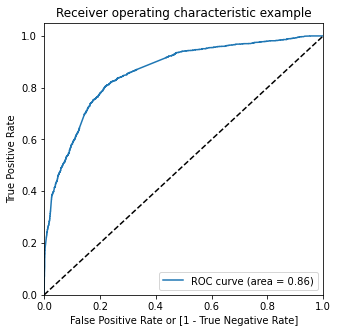

In [99]:
Plot_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve is good. Let's also look at the sensitivity vs. specificity tradeoff to determine the best cutoff point.

In [100]:
for i in [n/10 for n in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [101]:
cutoff_df = pd.DataFrame( columns=['prob','accuracy','sensi','speci'])

for i in [n/10 for n in range(10)]:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[i, accuracy, sensi, speci]
    
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.481731,1.000000,0.000000
0.1,0.1,0.527012,0.994416,0.092561
0.2,0.2,0.698274,0.944160,0.469723
0.3,0.3,0.767541,0.865984,0.676038
0.4,0.4,0.791975,0.810610,0.774654
0.5,0.5,0.788612,0.739414,0.834343
0.6,0.6,0.757229,0.624011,0.881055
0.7,0.7,0.735037,0.543509,0.913062
0.8,0.8,0.711500,0.453234,0.951557
0.9,0.9,0.644026,0.279665,0.982699


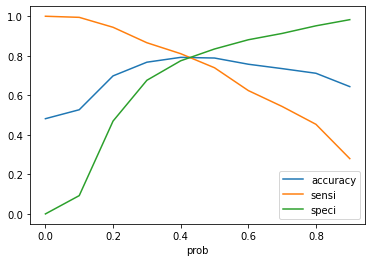

In [102]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Let's choose 0.42 as our cutoff value, since the best values for the three measures occur about 0.42.

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [104]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [106]:
TP, TN, FP, FN = confusion[1,1], confusion[0,0], confusion[0,1], confusion[1,0]

Sensitivity for P=4.2

In [107]:
TP/(TP+FN)

0.793392275476966

Specificity for P=4.2

In [108]:
TN/(TN+FP)

0.7884948096885813

## Test perfomance using Test Dataset

Apply necessary transformation to the test data set

In [109]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [110]:
X_test_sm = sm.add_constant(X_test[X_train.columns])
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,1,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,1,0,1,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,1,0,1,0


Make predictions on the test Data set

In [111]:
y_test_pred = pd.DataFrame(y_test)
y_test_pred["Conversion_Prob"] = logmodel5.predict(X_test_sm)
y_test_pred['final_predicted'] = y_test_pred.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_test_pred.head()

,Converted,Conversion_Prob,final_predicted
4771,1,0.996296,1
6122,0,0.129992,0
9202,0,0.703937,1
6570,1,0.299564,0
2668,1,0.720796,1


In [112]:
metrics.accuracy_score(y_test_pred['Converted'], y_test_pred.final_predicted)

0.7845188284518828

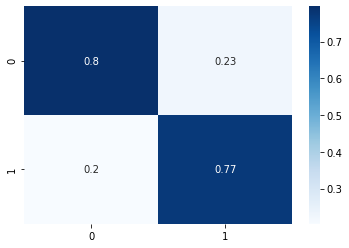

In [113]:
confusion = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.final_predicted )
sns.heatmap(confusion / sum(confusion), annot=True, cmap="Blues")
plt.show()

In [114]:
TP, TN, FP, FN = confusion[1,1], confusion[0,0], confusion[0,1], confusion[1,0]

Sensitivity

In [115]:
TP/(TP+FN)

0.7794759825327511

Specificity

In [116]:
TN/(TN+FP)

0.7891566265060241

### Precision-Recall Score

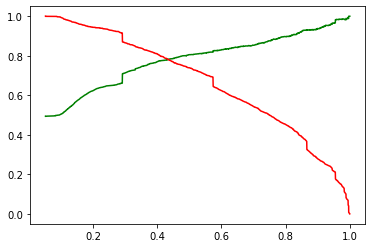

In [117]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

We will fix the probability threshold to same 4.2, since the precision-recall curve also gives a cut-off aroung 4.2 but in other cases we could go ahead and test the new thresholds.

## Feature Importance

In [118]:
feature_imp = pd.DataFrame(logmodel5.params.reset_index())
feature_imp.columns = ["Feature", "Coefficient"]
feature_imp

,Feature,Coefficient
0,const,0.204037
1,TotalVisits,11.148912
2,Total Time Spent on Website,4.422291
3,Lead Origin_Lead Add Form,4.205123
4,Lead Source_Olark Chat,1.452589
5,Lead Source_Welingak Website,2.152559
6,Do Not Email_Yes,-1.503680
7,Last Activity_Had a Phone Conversation,2.755220
8,Last Activity_SMS Sent,1.185594
9,What is your current occupation_Student,-2.357784


In [119]:
feature_imp[feature_imp.Feature != "const"].sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
1,TotalVisits,11.148912
2,Total Time Spent on Website,4.422291
3,Lead Origin_Lead Add Form,4.205123
11,Last Notable Activity_Unreachable,2.784594
7,Last Activity_Had a Phone Conversation,2.755220
5,Lead Source_Welingak Website,2.152559
4,Lead Source_Olark Chat,1.452589
8,Last Activity_SMS Sent,1.185594
6,Do Not Email_Yes,-1.503680
9,What is your current occupation_Student,-2.357784


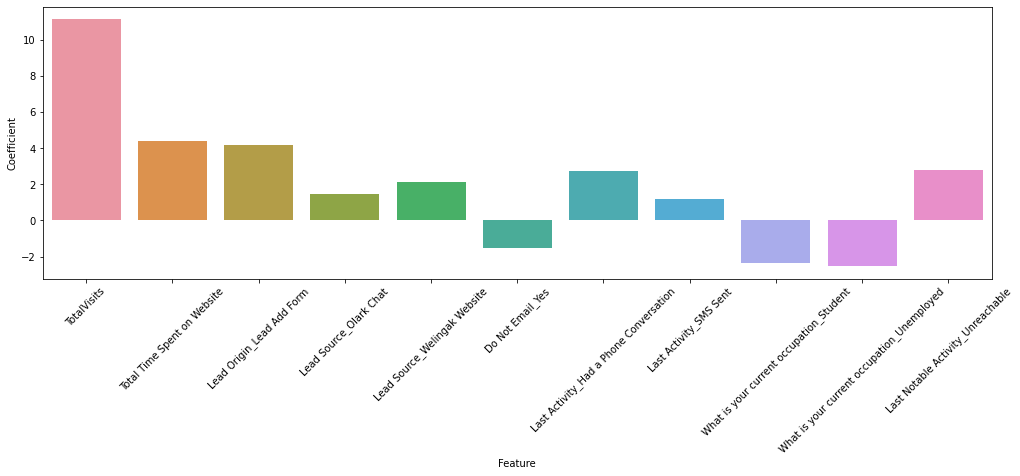

In [120]:
plt.figure(figsize=(17, 5))
plot = sns.barplot(data = feature_imp[feature_imp.Feature != "const"], x="Feature", y="Coefficient")
plt.xticks(rotation=45)
plt.show()

## Results

__Three features that contribute the most to the lead conversion probability__
1. Total Visits
2. Total Time Spent on Website
3. Lead Origin Lead Add Form

__Two features that negatively influence the likelihood of a lead conversion__
1. What is your current occupation Student
2. What is your current occupation Unemployed